In [ ]:
# ✅ 한글 폰트 설치 (NanumGothic)
!apt-get update -qq
!apt-get install -y fonts-nanum

# ✅ matplotlib 폰트 캐시 삭제
import os
os.system('rm -rf ~/.cache/matplotlib')

print("✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M+.) 을 꼭 해주세요.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,111 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
✅ 폰트 설치 완료! 이제 런타임 > 다시 시작(ctrl+M

In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model


# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
# 이미지가 들어있는 폴더이름이 결과데이터가 됨(그렇기때문에 폴더를 잘 구성해주어야 함)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.applications import ResNet152

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

import xgboost as xgb

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/balanceInfo_train_2.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FinalProject/data/전처리완료_데이터/balanceInfo_test_2.csv")
train_df

,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,201807,TRAIN_000000,998,962,22971,0,0,0,1084,547,...,2440,0,0,0,572,0,17008,0,0,D
1,201807,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,...,2677,0,2830,0,2736,0,0,0,0,E
2,201807,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,...,9118,0,8870,0,4429,0,43351,0,0,C
3,201807,TRAIN_000003,730,5025,26284,0,0,0,487,5607,...,884,0,0,0,5097,0,30697,0,0,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,3351,0,0,0,0,27337,4412,0,...,12524,0,0,0,0,0,0,0,23031,D
2399997,201812,TRAIN_399997,2524,2960,0,0,0,0,2694,3374,...,3241,0,0,0,3995,0,0,0,0,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [ ]:
df1 = train_df.drop(['ID'], axis=1)
df1
# df2 = test_df.drop(['Unnamed: 0'], axis=1)

,기준년월,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,월중평잔_CA_B0M,...,평잔_일시불_6M,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,Segment
0,201807,998,962,22971,0,0,0,1084,547,25032,...,2440,0,0,0,572,0,17008,0,0,D
1,201807,2565,2390,0,0,0,0,4090,2553,0,...,2677,0,2830,0,2736,0,0,0,0,E
2,201807,5312,5113,21531,6795,0,0,5006,8778,19420,...,9118,0,8870,0,4429,0,43351,0,0,C
3,201807,730,5025,26284,0,0,0,487,5607,31250,...,884,0,0,0,5097,0,30697,0,0,D
4,201807,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,3351,0,0,0,0,27337,4412,0,0,...,12524,0,0,0,0,0,0,0,23031,D
2399997,201812,2524,2960,0,0,0,0,2694,3374,0,...,3241,0,0,0,3995,0,0,0,0,C
2399998,201812,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [ ]:
# ▶ 1. 데이터 나누기
X = df1.drop("Segment", axis=1)
y = df1["Segment"]

# ▶ 2. 레이블 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 예: ['A', 'B', 'C'] → [0, 1, 2]

# ▶ 3. 학습용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ▶ 4. 모델 학습
model = xgb.XGBClassifier(tree_method='hist', device='cuda', n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# ▶ 5. 중요도 보기
importances = model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df.head(20))

            Feature  Importance
7      월중평잔_일시불_B0M    0.189194
62            평잔_6M    0.124082
69         평잔_CA_6M    0.075683
4   잔액_리볼빙일시불이월_B0M    0.047755
40      RV_최대잔액_R3M    0.039563
64     평잔_일시불_해외_6M    0.023199
47         월중평잔_일시불    0.022571
39      RV_평균잔액_R3M    0.021402
67         평잔_할부_6M    0.021014
63        평잔_일시불_6M    0.017753
52            평잔_3M    0.014776
3      잔액_현금서비스_B0M    0.013014
41    잔액_할부_유이자_B0M    0.012149
1        잔액_일시불_B0M    0.012039
2         잔액_할부_B0M    0.012012
17     잔액_현금서비스_B2M    0.011889
35     RV_평균잔액_R12M    0.011795
31          연체일수_최근    0.011663
42    잔액_할부_무이자_B0M    0.010354
61        평잔_카드론_3M    0.009766


In [ ]:
print(importance_df)

            Feature  Importance
7      월중평잔_일시불_B0M    0.251829
62            평잔_6M    0.179627
69         평잔_CA_6M    0.065154
40      RV_최대잔액_R3M    0.058998
4   잔액_리볼빙일시불이월_B0M    0.058952
..              ...         ...
11     연체잔액_일시불_B0M    0.000988
60      평잔_CA_해외_3M    0.000877
15     연체잔액_대환론_B0M    0.000000
34         매각잔액_B1M    0.000000
44   연체잔액_RV일시불_B0M    0.000000

[72 rows x 2 columns]


In [ ]:
threshold = 0.01
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()
selected_features

['월중평잔_일시불_B0M',
 '평잔_6M',
 '평잔_CA_6M',
 '잔액_리볼빙일시불이월_B0M',
 'RV_최대잔액_R3M',
 '평잔_일시불_해외_6M',
 '월중평잔_일시불',
 'RV_평균잔액_R3M',
 '평잔_할부_6M',
 '평잔_일시불_6M',
 '평잔_3M',
 '잔액_현금서비스_B0M',
 '잔액_할부_유이자_B0M',
 '잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_현금서비스_B2M',
 'RV_평균잔액_R12M',
 '연체일수_최근',
 '잔액_할부_무이자_B0M']

In [ ]:
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
importance_df['Cumulative'] = importance_df['Importance'].cumsum()
selected_features = importance_df[importance_df['Cumulative'] <= 0.90]['Feature'].tolist()
selected_features

['월중평잔_일시불_B0M',
 '평잔_6M',
 '평잔_CA_6M',
 'RV_최대잔액_R3M',
 '잔액_리볼빙일시불이월_B0M',
 '월중평잔_일시불',
 'RV_평균잔액_R3M',
 '평잔_일시불_해외_6M',
 '평잔_할부_6M',
 '평잔_3M',
 '평잔_일시불_6M',
 '잔액_현금서비스_B0M',
 '잔액_일시불_B0M',
 '잔액_할부_B0M',
 'RV_평균잔액_R12M',
 '잔액_할부_유이자_B0M',
 '잔액_현금서비스_B2M',
 '평잔_카드론_3M',
 '잔액_일시불_B1M',
 '잔액_할부_B1M',
 '잔액_할부_무이자_B0M',
 'RV_평균잔액_R6M',
 '잔액_카드론_B0M',
 '기준년월',
 '평잔_RV일시불_6M',
 '월중평잔',
 'RV_최대잔액_R12M',
 '평잔_할부_3M',
 '월중평잔_RV일시불',
 '최종연체회차',
 '잔액_할부_B2M',
 '연체일수_최근',
 '연체원금_B1M']

In [ ]:
!pip install catboost


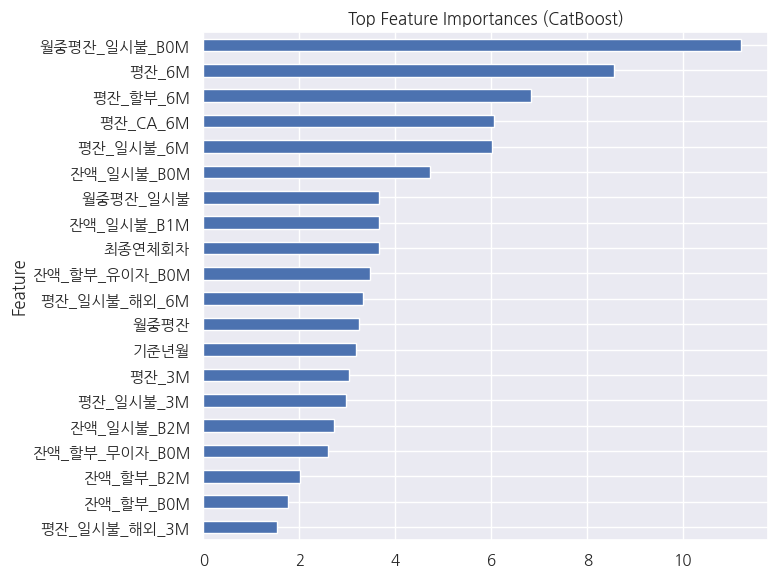

            Feature  Importance
7      월중평잔_일시불_B0M   11.203261
62            평잔_6M    8.561309
67         평잔_할부_6M    6.824948
69         평잔_CA_6M    6.047557
63        평잔_일시불_6M    6.018964
1        잔액_일시불_B0M    4.733168
47         월중평잔_일시불    3.660292
25       잔액_일시불_B1M    3.658187
33           최종연체회차    3.655006
41    잔액_할부_유이자_B0M    3.471827
64     평잔_일시불_해외_6M    3.322165
46             월중평잔    3.251564
0              기준년월    3.179253
52            평잔_3M    3.032813
53        평잔_일시불_3M    2.979185
26       잔액_일시불_B2M    2.725787
42    잔액_할부_무이자_B0M    2.605341
24        잔액_할부_B2M    2.017530
2         잔액_할부_B0M    1.771960
54     평잔_일시불_해외_3M    1.539751
57         평잔_할부_3M    1.284030
23        잔액_할부_B1M    1.233938
65      평잔_RV일시불_6M    1.160707
49          월중평잔_할부    0.923417
48       월중평잔_RV일시불    0.896645
55      평잔_RV일시불_3M    0.832336
8       월중평잔_할부_B0M    0.814795
4   잔액_리볼빙일시불이월_B0M    0.797709
17     잔액_현금서비스_B2M    0.755342
71        평잔_카드론_6M    0.733927


In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool
import pandas as pd

# 1. 입력 및 타깃 데이터 설정
X = df1.drop(columns=['Segment'])  # 특성
y = df1['Segment']                 # 타깃 (분류 label)

# 2. 결측치는 CatBoost가 자체 처리 가능 (따로 인코딩하지 않아도 됨)
# label encoding은 문자형만 해도 됨 (자동 처리됨)

# 3. CatBoostClassifier 모델 생성 및 학습
model = CatBoostClassifier(task_type='GPU', devices='0', verbose=0, random_state=42)
model.fit(X, y)

# 4. 중요도 추출
importances = model.get_feature_importance()
feature_names = X.columns

# 5. 중요도 데이터프레임 정리
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. 상위 N개 시각화
top_n = 20
importance_df.head(top_n).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), legend=False)
plt.title('Top Feature Importances (CatBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. 데이터프레임으로 결과 보기
print(importance_df.head(30))  # 중요도 상위 30개


In [ ]:
selected_features = importance_df[importance_df['Importance'] >= 1.0]['Feature'].tolist()
selected_features

['월중평잔_일시불_B0M',
 '평잔_6M',
 '평잔_할부_6M',
 '평잔_CA_6M',
 '평잔_일시불_6M',
 '잔액_일시불_B0M',
 '월중평잔_일시불',
 '잔액_일시불_B1M',
 '최종연체회차',
 '잔액_할부_유이자_B0M',
 '평잔_일시불_해외_6M',
 '월중평잔',
 '기준년월',
 '평잔_3M',
 '평잔_일시불_3M',
 '잔액_일시불_B2M',
 '잔액_할부_무이자_B0M',
 '잔액_할부_B2M',
 '잔액_할부_B0M',
 '평잔_일시불_해외_3M',
 '평잔_할부_3M',
 '잔액_할부_B1M',
 '평잔_RV일시불_6M']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# 2. X 데이터셋 생성
X = train_df[selected_features].copy()
X = add_constant(X)  # VIF 계산에 상수항 포함

# 3. VIF 계산
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. VIF 결과 정렬 출력
vif_df.sort_values(by="VIF", ascending=False)


,Feature,VIF
7,RV_평균잔액_R3M,61.080720
4,RV_최대잔액_R3M,32.637137
1,월중평잔_일시불_B0M,27.078758
6,월중평잔_일시불,19.530318
15,RV_평균잔액_R12M,16.781617
5,잔액_리볼빙일시불이월_B0M,15.605004
13,잔액_일시불_B0M,12.468596
2,평잔_6M,10.614708
10,평잔_3M,10.495016
12,잔액_현금서비스_B0M,8.123049


In [ ]:
check = ['기준년월', 'ID', 'Segment', '월중평잔_일시불_B0M',
 '평잔_6M',
 '평잔_CA_6M',
 '잔액_리볼빙일시불이월_B0M',
 'RV_최대잔액_R3M',
 '평잔_일시불_해외_6M',
 '월중평잔_일시불',
 'RV_평균잔액_R3M',
 '평잔_할부_6M',
 '평잔_일시불_6M',
 '평잔_3M',
 '잔액_현금서비스_B0M',
 '잔액_할부_유이자_B0M',
 '잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_현금서비스_B2M',
 'RV_평균잔액_R12M',
 '연체일수_최근',
 '잔액_할부_무이자_B0M']

check_test = ['기준년월', 'ID', '월중평잔_일시불_B0M',
 '평잔_6M',
 '평잔_CA_6M',
 '잔액_리볼빙일시불이월_B0M',
 'RV_최대잔액_R3M',
 '평잔_일시불_해외_6M',
 '월중평잔_일시불',
 'RV_평균잔액_R3M',
 '평잔_할부_6M',
 '평잔_일시불_6M',
 '평잔_3M',
 '잔액_현금서비스_B0M',
 '잔액_할부_유이자_B0M',
 '잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_현금서비스_B2M',
 'RV_평균잔액_R12M',
 '연체일수_최근',
 '잔액_할부_무이자_B0M']


filterd_df =  train_df[check]
filterd_test_df =  test_df[check_test]
display(filterd_df)
display(filterd_test_df)

,기준년월,ID,Segment,월중평잔_일시불_B0M,평잔_6M,평잔_CA_6M,잔액_리볼빙일시불이월_B0M,RV_최대잔액_R3M,평잔_일시불_해외_6M,월중평잔_일시불,...,평잔_일시불_6M,평잔_3M,잔액_현금서비스_B0M,잔액_할부_유이자_B0M,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B2M,RV_평균잔액_R12M,연체일수_최근,잔액_할부_무이자_B0M
0,201807,TRAIN_000000,D,1084,15988,17008,0,0,0,1503,...,2440,18557,22971,0,998,962,24580,0,0,962
1,201807,TRAIN_000001,E,4090,7045,0,0,0,0,4447,...,2677,7031,0,2390,2565,2390,0,0,0,0
2,201807,TRAIN_000002,C,5006,66549,43351,6795,5134,0,5540,...,9118,70265,21531,0,5312,5113,22118,1478,0,5113
3,201807,TRAIN_000003,D,487,30139,30697,0,0,0,606,...,884,33741,26284,2368,730,5025,30526,0,0,2657
4,201807,TRAIN_000004,E,0,28,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399996,201812,TRAIN_399996,D,4412,67826,0,0,0,0,5515,...,12524,35344,0,0,3351,0,0,0,0,0
2399997,201812,TRAIN_399997,C,2694,8627,0,0,0,0,3046,...,3241,8500,0,0,2524,2960,0,0,0,2960
2399998,201812,TRAIN_399998,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,기준년월,ID,월중평잔_일시불_B0M,평잔_6M,평잔_CA_6M,잔액_리볼빙일시불이월_B0M,RV_최대잔액_R3M,평잔_일시불_해외_6M,월중평잔_일시불,RV_평균잔액_R3M,...,평잔_일시불_6M,평잔_3M,잔액_현금서비스_B0M,잔액_할부_유이자_B0M,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B2M,RV_평균잔액_R12M,연체일수_최근,잔액_할부_무이자_B0M
0,201807,TEST_00000,6412,3847,0,0,0,384,5187,0,...,2933,4232,0,0,4802,0,0,0,0,0
1,201807,TEST_00001,1010,42634,1530,0,0,0,865,0,...,657,44649,5448,3120,1201,8628,0,0,0,5507
2,201807,TEST_00002,4407,22936,0,0,0,0,5591,0,...,6253,20328,0,2853,3046,6144,0,0,0,3290
3,201807,TEST_00003,1107,1206,0,0,0,0,1545,0,...,819,2140,0,0,768,945,0,0,0,945
4,201807,TEST_00004,1072,2914,0,0,0,0,1462,0,...,979,3833,0,0,637,2558,0,0,0,2558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,201812,TEST_99995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599996,201812,TEST_99996,260,275,0,0,0,0,256,0,...,137,287,0,0,191,0,0,0,0,0
599997,201812,TEST_99997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599998,201812,TEST_99998,16911,20549,0,0,0,240,14005,0,...,18108,17359,0,0,17916,2786,0,0,0,2786


In [ ]:
combined_df = pd.concat([filterd_df, filterd_test_df], axis=0, ignore_index=True)
combined_df

,기준년월,ID,Segment,월중평잔_일시불_B0M,평잔_6M,평잔_CA_6M,잔액_리볼빙일시불이월_B0M,RV_최대잔액_R3M,평잔_일시불_해외_6M,월중평잔_일시불,...,평잔_일시불_6M,평잔_3M,잔액_현금서비스_B0M,잔액_할부_유이자_B0M,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B2M,RV_평균잔액_R12M,연체일수_최근,잔액_할부_무이자_B0M
0,201807,TRAIN_000000,D,1084,15988,17008,0,0,0,1503,...,2440,18557,22971,0,998,962,24580,0,0,962
1,201807,TRAIN_000001,E,4090,7045,0,0,0,0,4447,...,2677,7031,0,2390,2565,2390,0,0,0,0
2,201807,TRAIN_000002,C,5006,66549,43351,6795,5134,0,5540,...,9118,70265,21531,0,5312,5113,22118,1478,0,5113
3,201807,TRAIN_000003,D,487,30139,30697,0,0,0,606,...,884,33741,26284,2368,730,5025,30526,0,0,2657
4,201807,TRAIN_000004,E,0,28,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999996,201812,TEST_99996,NaN,260,275,0,0,0,0,256,...,137,287,0,0,191,0,0,0,0,0
2999997,201812,TEST_99997,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999998,201812,TEST_99998,NaN,16911,20549,0,0,0,240,14005,...,18108,17359,0,0,17916,2786,0,0,0,2786


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject/data/피처선택완료_데이터/combined_data_1.csv', index=False, encoding='utf-8-sig')